# Kapitel 10 - Gradient Descent

In [1]:
import sys
sys.path.append("../src/") 
from quiz import start_quiz
from utils import css_styling, hide_code
from functionplotter import plt_function
css_styling()

## 1. Kapitelübersicht <a class="anchor" id="1"/>

In diesem Kapitel wird das **Gradient Descent** (deutsch: **Gradientenabstieg**) Verfahren eingeführt. Zuvor wird für ein besseres Verständnis das **Newton-Raphson** Verfahren eingeführt und erläutert. Da dies das letzte Kapitel der Calculus-Tutorialreihe ist, wird am Ende des Kapitels ein Ausblick auf vertiefende und weiterführende Calculus-Themen geworfen sowie Empfehlungen für Themengebiete aus den Digital Humanities gegeben, die man mit dem in dieser Tutorialreihe erworbenem Wissen nun angehen kann.

<b>Abschnittsübersicht</b><br>

[1. Kapitelübersicht](#1)<br>
[2. Newton-Raphson Verfahren](#2)<br>
&nbsp; [2.1. Gründe für die Notwendigkeit des Newton-Raphson Verfahren](#2-1)<br>
&nbsp; [2.2. Vom naiven Ansatz zum Verfahren](#2-2)<br>
&nbsp;[2.3. Das Verfahren](#2-3)<br>
[3. Gradient Descent](#3)<br>
&nbsp; [3.1. Unterschiede zum Newton-Raphson Verfahren](#3-1)<br>
&nbsp; [3.2. Erste naive Berechnung](#3-2)<br>
&nbsp; [3.3. Die Lernrate](#3-3)<br>

<b>Quizübersicht</b><br>
[Gradient Descent Quiz](#q1)<br>

<b>Behandelte Themen</b><br>
- Newton-Raphson Verfahren
- Grenzen von Visualisierungen
- Allgemeine Tangentengleichung
- Iterative Verfahren / Iterationen
- Gradient Descent Verfahren
- Lernraten

## 2. Newton-Raphson Verfahren  <a class="anchor" id="2"/>

Mit dem **Newton-Raphson** Verfahren können wir näherungsweise *Nullstellen*, *Schnittpunkte* von Funktionen oder *Wurzeln* berechnen. Wie auch im vorherigen Kapitel haben wir es hier mit **Approximationen** zu tun. Anstatt aber eine komplexe Funktionen mithilfe einer Reihe von weniger komplexen Funktionen zu approximieren, approximieren wir hier nun verschiedene **Lösungen** von Funktionen (also das Finden von Wurzeln, die Berechnung von Schnittpunkten oder die Berechnung von Nullstellen).

### 2.1. Gründe für die Notwendigkeit des Newton-Raphson Verfahren <a class="anchor" id="2-1"/>

Um zu verstehen, warum und in welchen Fällen wir das Newton-Raphson Verfahren benötigen, schauen wir uns eine Beispielfunktion an:<br>

$f(x) = x^3 - 2x + 2$<br>

Die Ableitung der Funktion ist:<br>

$f'(x) = 3x^2 - 2$ <br>

Den Graphen der Funktion können Sie in der folgenden Code-Zelle plotten. Sie sehen, dass der Graph zwei **Wendepunkte** hat, also zwei Punkte, an denen sich die Art der Steigung (= Fallen oder Steigen) ändert.[<sup>1</sup>](#fn1) Der erste Wendepunkt ist ein **Maximum**, der zweite Wendepunkt ist ein **Minimum**. 

Für das Verständnis der Notwendigkeit eines Verfahrens wie das Newton-Raphson Verfahren ist es wichtig, dass man sich vor Augen führt, dass wir den Graphen einer Funktion nicht immer so einfach visualisieren können, wie es für diese Funktion der Fall ist. Dies kann z.B. die folgenden Gründe haben:
- **Nicht genügend Rechenkraft unseres Computers**. Je komplexer eine Funktion wird, umso schwieriger wird es für den Computer, diese gut zu visualisieren. Unsere Beispielfunktion ist davon nicht betroffen, doch Sie können sich sicher vorstellen, wie kompliziert Funktionen werden können.
- **Zu hohe Dimensionalität**. Ein Problem, welches sehr schnell auftaucht, ist, dass unsere Funktionen zu viele Dimensionen haben und wir sie deshalb nicht visualisieren können. Bis jetzt hatten wir in unseren Beispielen nur Funktionen geplottet, die wir im 2D oder 3D Raum visualisieren können. Doch was wäre mit der Funktion $f(x,y,z,w,v)$? Diese hat fünf Variablen und man bräuchte 6 Dimensionen, um diese darstellen zu können (was unmöglich ist). 

Es ist möglich, bestimmte Probleme von Funktionen zu lösen, ohne dafür einen Graphen plotten zu müssen. Wäre dies nicht der Fall, könnten wir nicht mit Funktionen mit höheren Dimensionen rechnen. Tatsächlich ist es uns bei Aufgaben wir der Berechnung der Ableitung jedoch egal, ob wir 2 oder 5 Eingabevariablen haben. Die Berechnung ist zwar aufwendiger, das Grundprinzip jedoch gleich. Auch wenn wir die Visualisierung von Graphen nicht unbedingt für die Lösung von Problemen benötigen, hilft uns die Darstellung bei Problemen wie der Berechnung der Schnittpunkte mit der x-Achse (auch **Nullstelle** genannt). Doch wir können die graphische *Intuition* und *Konzeption* der Visualisierung von Funktionen auch dann nutzen, wenn wir den Graphen einer Funktion <u>nicht</u> visualisieren können. Dies machen wir, indem wir die Lösungen **approximieren**. 

Schauen wir uns das an der oben aufgestellten Funktion an. Nehmen wir nun einmal an, wir wollen den **Schnittpunkt** der Funktion mit der **x-Achse** ermitteln (= **Nullstelle**). Wenn wir uns den Graphen in der folgenden Code-Zelle angucken, können wir sehr schnell sehen, dass dieser zwischen $-1$ und $-2$ liegt, da der Graph dort die x-Achse schneidet. Wir könnten nun das Koordinatensystem feiner darstellen und dann ablesen, dass der Schnittpunkt etwa bei $-1.77$ liegt. 

Doch ohne den Graphen wird dies schwieriger. Um diesen Schnittpunkt zu berechnen, müssen wir $y=0$ setzen, also $0 = x^3 - 2x +2$ und nach $x$ auflösen.[<sup>2</sup>](#fn2) Während das für lineare Funktion relativ unkompliziert zu berechnen ist, kommen wir bei dieser Funktion schon an unsere Grenzen. Die Lösunggleichung würde folgendermaßen aussehen:<br>

$\frac{3^{\frac{2}{3}} \left(\frac{2}{3} + \frac{\left(3 \sqrt{57} + 27\right)^{\frac{2}{3}}}{9}\right)}{\sqrt[3]{\sqrt{57} + 9}} \approx -1.76929235423863$<br>


Wirklich schön ist das nicht und die Funktion ist in diesem Fall vergleichsweise einfach. Sie können sich sicher vorstellen, wie die umfangreich die Berechnungen werden, wenn die Funktionen noch komplexer sind. Ein weiteres Problem, was wir haben, wenn wir den Graphen nicht sehen, ist, dass wir nicht wissen, *wieviele* Schnittstellen die Funktion mit der x-Achse hat. 


<hr style="border: 0.1px solid black;"/>
<span id="fn1" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">1</sup>&nbsp; Wie man Wendepunkte ermittelt, kann in diesem <a href="https://www.mathebibel.de/wendepunkt-berechnen#:~:text=Graphisch%20betrachtet%20handelt%20es%20sich,in%20eine%20Linkskurve%20oder%20umgekehrt">Artikel</a> nachgelesen werden.</span><br>
<span id="fn2" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">2</sup>&nbsp; Wie man den Schnittpunkt einer Funktion mit der x-Achse ermittelt, kann in diesem <a href="https://de.serlo.org/mathe/2195/schnittpunkte-mit-den-koordinatenachsen">Artikel</a> im Detail nachgelesen werden.</span><br>

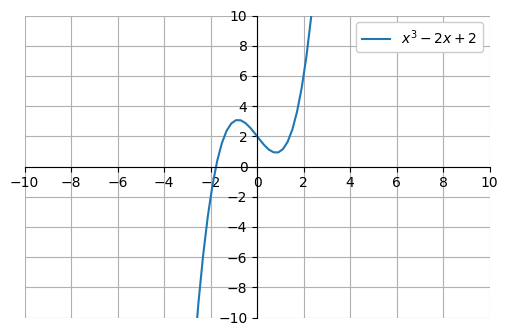

In [2]:
plt_function(name="newton_raphson_example", space=(-10.0, 10.0), tangent=False)

### 2.2. Vom naiven Ansatz zum Verfahren <a class="anchor" id="2-2"/>

Wir verwenden nun einen naiven Ansatz, um den Schnittpunkt des Graphen mit der x-Achse zu ermitteln. Wir wissen, dass sobald wir einen x-Wert $x_0$ finden, für den $f(x_0) = 0$ ergibt, dies der Wert ist, an welchem wir einen Schnittpunkt mit der x-Achse haben. Wir **nähern** uns nun dem Problem an, in dem wir stumpf x-Werte in unsere Funktion einsetzen und diese nach und nach anpassen, je nachdem, wie nah der resultierende y-Wert an $0$ liegt. Nehmen wir nun den x-Wert $-2$ und setzen diesen in unsere Gleichung ein:<br>

$f(x) = (-2)^3 - 2 \cdot -2 + 2 = -2$<br>

Mithilfe von dieser Information wissen wir, dass wir uns **unterhalb** der x-Achse befinden. Setzen wir nun einen beliebigen anderen x-Wert ein: $-1$:<br>

$f(x) = (-1)^3 - 2 \cdot -1 + 2 = 3$<br>

Nun befinden wir uns **oberhalb** der x-Achse, da der y-Wert **positiv** ist. Wir haben den Schnittpunkt mit der x-Achse verpasst, da unser y-Wert noch weiter von $0$ entfernt ist als vorher. Setzen wir nun einen anderen x-Wert ein, $-3$:<br>

$f(x) = (-3)^3 - 3 \cdot -1 + 2 = -22$<br>

Nun befinden wir uns wieder **unterhalb** der x-Achse, sind aber noch viel weiter von dieser entfernt, als beim x-Wert $-2$. Wir könnten nun vermuten, dass unser optimaler x-Wert zwischen $-2$ und $-1$ liegt. Irgendwo in diesem Bereich muss der Graph die x-Achse passiert bzw. geschnitten haben, da es nicht möglich ist, dass die kubische Funktionsgleichung, die wir vorliegen haben, einen "abrupten Linksruck" macht und z.B. erst bei $x = -4$ die x-Achse schneidet (bei komplexeren Funktionen könnte sowas unter Umständen aber passieren).


Nun könnten wir natürlich immer weiter herumraten, bis wir irgendwann den richtigen Wert erhalten. Tatsächlich ist dies im Grunde auch das, was das **Newton-Raphson Verfahren** macht. Jedoch geht dies etwas geschickter und zielstrebiger vor. Auch wir können unseren sehr naiven Ansatz noch verbessern, in dem wir die **Eigenschaften der ersten Ableitung** beachten. Wenn wir nämlich den geratenen x-Wert $x_0$ in unsere Ableitung einsetzen, erhalten wir einen positiven Wert, was bedeutet, dass der Graph in diesem Punkt steigt.[<sup>3</sup>](#fn3)

$f'(x_0) = 3(-2)^2 - 2 = 10$

Mithilfe von diesen beiden Informationen wissen wir Folgendes: Wir befinden uns <u>unterhalb</u> der x-Achse (da $f(x_0) = y = -2$) und der Graph <u>steigt</u> (da $f'(x) = 10$), was bedeutet, dass wir, wenn wir den Graphen "hochgehen" würden, wir irgendwann zum Schnittpunkt mit der x-Achse kommen würden. Somit erhalten wir eine "Richtung", in die wir unseren x-Wert anpassen können.

<hr style="border: 0.1px solid black;"/>
<span id="fn3" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">3</sup>&nbsp; Setzt man eine x-Koordinate $x_0$ eines Punktes in die erste Ableitung ein, kann man je nach Vorzeichen des Ergebnis bestimmen, ob der Graph <b>steigt</b> ($f'(x_0) > 0$), <b>fällt</b> ($f'(x_0) < 0$) oder <b>stagniert</b>, also weder fällt noch steigt ($f'(x_0) = 0$). Weitere Informationen zur Eigenschaften der ersten Ableitungen können in diesem <a href="https://www.mathebibel.de/erste-ableitung">Artikel</a> nachgelesen werden.</span><br>

Auf unserer Grundidee basiert auch das **Newton-Raphson Verfahren**, jedoch stellt es eine Annahme auf, sodass dieser Vorgang effektiver gestaltet werden kann. Diese Annahme lautet:

<blockquote>Der Schnittpunkt einer Funktion mit der x-Achse ist ungefähr der Gleiche wie der Schnittpunkt einer <b>Tangenten</b> der Funktion mit der x-Achse.</blockquote>

Plotten Sie in der folgenden Code-Zeile verschiedene Punkte der Funktion und die dazugehörigen Tangenten. In diesem Beispiel wissen wir, dass der Schnittpunkt der Funktion mit der x-Achse bei $\approx -1.77$ liegt. Tatsächlich ist der Schnittpunkt der Tangente mit der x-Achse dem Schnittpunkt der Funktion umso ähnlicher, je näher unser ausgewählter Punkt diesem Schnittpunkt kommt. Setzen Sie $x_0$ bzw. $p_x$ gleich $-2$, ist er beinahe identisch. Verringern Sie den Wert auf etwa $-3$, können Sie sehen, wie der Schnittpunkt der Tangente immer weiter von dem Schnittpunkt der Funktion weggeht. Das selbe passiert, wenn wir den Wert von $x_0$ bzw. $p_x$ erhöhen. Die ursprüngliche Funktion wird also **linearisiert**; ein Verfahren, welches wir bereits im vorherigen Kapitel bei multivariablen Taylorreihen gesehen haben.

In [3]:
plt_function(name="newton_raphson_example", space=(-10.0, 10.0), startvalue=-2., slider_step=0.1, tangent=True)

interactive(children=(FloatSlider(value=-2.0, continuous_update=False, description='p_x', max=10.0, min=-10.0,…

Diese Aussage von Newton schauen wir uns nun genauer an. Dazu benötigen wir die **Tangente** unseres Punkts. Diese ist ja eine lineare Funktion und hat deshalb die Form $f(x) = mx+b$ (siehe Kapitel 2). Die Steigung $m$ erhalten wir, in dem wir unseren Punkt in die **erste Ableitung** einsetzen (also $f'(x_0) = m$). Dies haben wir bereits gemacht und für $x_0 = -2$ die Steigung $m = 10$ erhalten. Zusammen mit dem errechneten y-Wert (also $f(x_0) = y$) von $-2$ setzen wir dies in die Formel für die lineare Funktion ein und erhalten durch Umstellen den y-Achsenabschnitt $b = 18$:[<sup>4</sup>](#fn4)<br>

$f(x) = mx + b$<br>
&rarr;&nbsp; $f(x_0) = f'(x_0) \cdot x_0 + b$<br>
&rarr;&nbsp; $-2 = 10 \cdot -2 + b$<br>
&rarr;&nbsp; $-2 = -20 + b$<br>
&rarr;&nbsp; $18 = b$<br>

In der vorherigen Code-Zeile können Sie die Tangente zum Punkt plotten. Um die Tangente zu berechnen, kann man auch die Formel für die **allgemeine Tangentengleichung** verwenden:<br>

$t(x) = f'(x_0) \cdot (x-x_0) + f(x_0)$ &nbsp;&nbsp;&nbsp; wobei $x_0$ der x-Wert unseres Punktes ist.<br>

Setzen wir in diese Formel $x_0$ ein, erhalten wir die selbe Gleichung:<br>

$t(x) = 10 \cdot (x + 2) -2$<br>
&rarr;&nbsp; $t(x) = 10x + 20 - 2$<br>
&rarr;&nbsp; $t(x) = 10x + 18$<br>

**Newton** hat nun diese Tangentengleichung gleich $0$ gesetzt und diese dann nach $x$ umgestellt:<br>

$0 = f'(x_0) \cdot (x-x_0) + f(x_0) \qquad \vert -f(x_0)$<br>

$-f(x_0) = f'(x_0) \cdot (x-x_0) \qquad \vert :f'(x_0)$<br>

$-\frac{f(x_0)}{f'(x_0)} = x - x_0 \qquad\qquad\qquad \vert +x_0$<br>

$x_0 -\frac{f(x_0)}{f'(x_0)} = x$


Mit dieser Formel kann im Grunde die **Nullstelle der Tangenten** berechnet werden, also der Schnittpunkt mit der x-Achse.[<sup>5</sup>](#fn5) Sie ist ein Teil der Formel für das Newton-Raphson Verfahren:<br>

$x_{i+1} = x_i -\dfrac{f(x_0)}{f'(x_0)}$<br>

Diese Formel ist eine Erweiterung der Tangenten-Nullstellen-Berechnung. Das Problem bei dieser Berechnung der Tangenten-Nullstelle ist nämlich, dass der ganze Vorgang nur **einmal** durchgeführt wurde. Wenn unser eingesetzter x-Wert $x_0$ sehr *nahe* an dem wirklichen Schnittpunkt liegt, ist das kein Problem, da wir sagen könnten, dass wir den Schnittpunkt gut genug **angenähert** bzw. **approximiert** haben. Doch wie Sie sich sicher vorstellen können, haben wir ein Problem, wenn unsere anfängliche Vermutung sehr weit vom eigentlichen Schnittpunkt entfernt liegt. Was also tun? Die Berechnung der Nullstelle der Tangente wird einfach **öfters** durchgeführt, was bedeutet, dass wir immer wieder neue Punkte in die Formel einsetzen, welche die Punkte aus dem vorherigen Durchgang sind, und so nach und nach zu unserer Lösung gelangen. Diese Verfahrensweise nennt man auch **iteratives Verfahren** oder **Iteration**. Dabei wird ein und dieselbe Rechnung so oft durchgeführt, bis ungefähr der Wert herauskommt, den wir erwarten. Das schauen wir uns im nächsten Abschnitt genauer an. Wie das Verfahren graphisch arbeitet, können Sie im GIF in der nächsten Zelle sehen.


<hr style="border: 0.1px solid black;"/>
<span id="fn4" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">4</sup>&nbsp; In diesem <a href="https://www.youtube.com/watch?v=-AyUqLeTtrE">Video</a> kann nochmal im Detail nachgeguckt werden, wie man eine Tangentengleichung aufstellt.</span><br>
<span id="fn5" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">5</sup>&nbsp; In diesem <a href="https://www.gut-erklaert.de/mathematik/schnittpunkt-x-achse.html">Artikel</a> kann nachgelesen werden, wie man den Schnittpunkt mit der x-Achse einer linearen Funktion ermittelt wird.</span><br>

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" alt="Von: https://de.wikipedia.org/wiki/Newtonverfahren" align="left" width="500"/>

### 2.3. Das Verfahren <a class="anchor" id="2-3"/>

<div class="tool">
<span class="invisible_border"><img src="img/icons/tools.svg" class="icon"/><b>Werkzeugkasten: <u>Newton-Raphson Verfahren</u></b></span>
    <br>
    <br>Das <b>Newton-Raphson</b> Verfahren wird verwendet, um <b>Lösungen</b> von Funktionen wie das Finden von <i>Wurzeln</i>, die Berechnung von <i>Schnittpunkten</i> oder die Ermittlung von <i>Nullstellen</i> zu <b>approximieren</b>. Es ist ein <b>iteratives</b> Verfahren, wird also solange mit leicht veränderten Werten berechnet, bis ein erwartetes Ergebnis eintritt oder ein Abbruchkriterium erfüllt wird.
    
$x_{i+1} = x_i -\dfrac{f(x_0)}{f'(x_0)}$<br>
</div>

Rekapitulieren wir noch einmal, was wir im letzten Abschnitt herausgefunden haben. Das Newton-Raphson Verfahren verwendet eine umgestellte Tangentengleichung, mithilfe wir den Schnittpunkt mit der x-Achse erhalten können. Es ist ein **iteratives Verfahren**, was bedeutet, dass wir es mehr als einmal durchführen. Letzteres schauen wir uns nun im Detail an.

Wir nehmen erneut die Gleichung aus den vorherigen beiden Abschnitten und berechnen die erste Ableitung:<br>

$f(x) = x^3 - 2x + 2$<br>

$f'(x) = 3x^2 - 2$<br>

Als Startpunkt für unsere iteratives Verfahren verwenden wir $x_0 = -2$. Wenn Sie einen Blick auf die Formel werfen, sollte Ihnen auch klar werden, warum wir die x-Koordinate $x_0$ nennen: Die $0$ ist unser Start-$i$, welches wir bei jedem Durchgang um $1$ erhöhen. Alle Werte speichern wir in einer Tabelle:

<table id="centertable" >
    <tr style="background-color: #f6f6f6;">
        <th>$i$</th>
        <th>$x_i$</th>
        <th>$f(x_i)$</th>
        <th>$f'(x_i)$</th>
    </tr>
    <tr style="background-color: #e5f2e5;">
        <td>0</td>
        <td>$-2$</td>
        <td>$-2$</td>
        <td>$10$</td>
    </tr>
</table> 

Das setzen wir nun in die Formel für das Newton-Raphson Verfahren ein, um den nächsten $x_i$ Wert zu erhalten, in diesem Fall $x_1$. Dann können wir auch $f(x_1)$ und $f'(x_1)$ ermitteln:

<table id="centertable" >
    <tr style="background-color: #f6f6f6;">
        <th>$i$</th>
        <th>$x_i$</th>
        <th>$f(x_i)$</th>
        <th>$f'(x_i)$</th>
    </tr>
    <tr >
        <td>0</td>
        <td>$-2$</td>
        <td>$-2$</td>
        <td>$10$</td>
    </tr>
    <tr style="background-color: #e5f2e5;">
        <td>1</td>
        <td>$-1.8$</td>
        <td>$-0.23$</td>
        <td>$7.7$</td>
    </tr>
</table> 

Das machen wir nun für zwei weitere Schritte, wobei wir $x_2$ und $x_3$ erhalten:

<table id="centertable" >
    <tr style="background-color: #f6f6f6;">
        <th>$i$</th>
        <th>$x_i$</th>
        <th>$f(x_i)$</th>
        <th>$f'(x_i)$</th>
    </tr>
    <tr >
        <td>0</td>
        <td>$-2$</td>
        <td>$-2$</td>
        <td>$10$</td>
    </tr>
    <tr>
        <td>1</td>
        <td>$-1.8$</td>
        <td>$-0.23$</td>
        <td>$7.7$</td>
    </tr>
    <tr style="background-color: #e5f2e5;">
        <td>2</td>
        <td>$-1.77$</td>
        <td>$-0.005$</td>
        <td>$7.4$</td>
    </tr>
    <tr style="background-color: #e5f2e5;">
        <td>3</td>
        <td>$-1.769$</td>
        <td>$-0.0000023$</td>
        <td>$7.39$</td>
    </tr>
</table> 

Nach nur drei Iterationen haben wir es geschafft, unseren Schnittpunkt mit der x-Achse zu finden, also dass $f(x_3) \approx 0$ ist, mit einer sehr kleinen Abweichung. Wir haben also den Schnittpunkt mit dem Newton-Raphson Verfahren **approximiert**. Diese Lösung ist sehr elegant, da wir keine Visualisierung des Graphen benötigt haben. 

Einige Fragen bleiben bei diesem Verfahren jedoch offen:
- **Kann das Newton-Raphson Verfahren für jede Funktion verwendet werden?** Nein, **lineare Funktionen** werden nicht unterstützt. Das liegt daran, dass eine lineare Funktion keine Tangente hat. Eine Tangente wäre nämlich bei jedem Punkt der Funktion gleich, da sie selbst eine lineare Funktion ist.
- **Wie lange muss ich das Verfahren ausführen?** Für iterative Verfahren gibt es normalerweise ein **Abbruchkriterium**, mit dem gesagt wird, wann man aufhören soll, das Verfahren durchzuführen. Möglichkeiten dafür wären entweder eine vorher festgelegte Anzahl an Schritten (z.B. $i = 10$), eine Grenze für die Nachkommastellen von $x_i$ (z.B. soll nach 10 Nachkommastellen von $x_i$ abbgebrochen werden) oder wenn $f(x_i)$ eine gewissen **Schwellenwert** erreicht, d.h. in diesem Fall sehr, sehr nahe an $0$ ist (auf eine vorgegebene Anzahl an Nachkommastellen gerundet).
- **Was passiert, wenn die erste Ableitung $0$ ergibt?** Dies darf nicht passieren, d.h. wir müssten dann die Iteration abbrechen. Wir würden ansonsten durch $0$ teilen und das ist bekanntlich nicht erlaubt.
- **Wie schnell kommen wir mit diesem Verfahren zur Lösung?** Das Verfahren hat eine **quadratische Konvergenz**, was bedeutet, dass sich die Anzahl der richtigen Nachkommastellen von $f(x_i)$ jede Iteration in etwa **verdoppelt**. Tatsächlich konnten wir das oben bereits beobachten: Von Iteration $0$ zu $1$ ist die Anzahl der Nachkommastellen von $0$ auf $1$ gestiegen, von Iteration $1$ zu $2$ von $1$ auf $3$ und von Iteration $2$ zu $3$ von $3$ auf $6$. In den meisten Fällen hat das Verfahren bei einer guten Auswahl vom Startwert $x_0$ nach 3 oder 4 Iterationen ein beinahe perfekte Lösung gefunden, d.h. eine Lösung mit einer sehr geringen Abweichung.
- **Wie finde ich den Startwert $x_0$ heraus, wenn ich nicht weiß, wie die Funktion aussieht?** Das ist ein sehr großes Problem. Wenn der Startwert schlecht gewählt ist, kann es sein, dass das Verfahren **divergiert**, was bedeutet, dass die Werte gegen $+\infty$ oder $-\infty$ "schießen". Es kann auch **oszillieren**, d.h. es "springt" zwischen zwei Punkten hin und her. Dann kann es auch noch sein, dass wir eine **andere Nullstelle** finden, da es sein kann, dass eine Funktionen mehrere Nullstellen hat. 
- **Kann ich das Verfahren auch für andere Probleme verwenden, die nicht irgendeine Form der Nullstellen-Berechnung beinhalten?** Ja, das ist möglich, dadurch muss die Formel aber etwas modifiziert werden. Dies werden wir uns in dieser Tutorialreihe nicht angucken.


Wir gucken uns nun eines der Probleme an, die bei dem Newton-Raphson Verfahren auftreten können. Nehmen wir an, wir haben als Startpunkt $x= 0$ gewählt und berechnen die ersten drei Iterationen:

<table id="centertable" >
    <tr style="background-color: #f6f6f6;">
        <th>$i$</th>
        <th>$x_i$</th>
        <th>$f(x_i)$</th>
        <th>$f'(x_i)$</th>
    </tr>
    <tr style="background-color: #e5f2e5;">
        <td>0</td>
        <td>$0$</td>
        <td>$2$</td>
        <td>$-2$</td>
    </tr>
    <tr style="background-color: #e5f2e5;">
        <td>1</td>
        <td>$1$</td>
        <td>$1$</td>
        <td>$1$</td>
    </tr>
    <tr style="background-color: #e5f2e5;">
        <td>2</td>
        <td>$0$</td>
        <td>$2$</td>
        <td>$-2$</td>
    </tr>
    <tr style="background-color: #e5f2e5;">
        <td>3</td>
        <td>$1$</td>
        <td>$1$</td>
        <td>$1$</td>
    </tr>
</table> 

Iteration $2$ und $3$ sind die gleichen Iterationen wie $0$ und $1$. Auch für die folgenden Iterationen wird dieses Muster wiederholt. Das Verfahren **oszilliert** hier, d.h. es "springt" zwischen zwei Punkten hin und her und es wird nie die Lösung finden. Das können Sie sich auch in der folgenden Code-Zelle ansehen.

In [4]:
plt_function(name="newton_raphson_example", space=(-10.0, 10.0), startvalue=0, slider_step=1, tangent=True)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='p_x', max=10.0, min=-10.0, …

## 3. Gradient Descent  <a class="anchor" id="3"/>

Das Newton-Raphson Verfahren, welches wir im vorherigen Abschnitt kennengelernt haben, ist nur für eindimensionale Funktionen definiert, also Funktionen, die nur **eine Variable** als Eingabe erhalten (z.B. $f(x)$). Es ist jedoch auch möglich, dass Verfahren für zwei- oder höherdimensionale Funktionen zu erweitern. Dazu verwendet man das sogenannte **Gradient Descent** (deutsch: **Gradientenabstieg**) Verfahren. Wir verwenden hier bewusst den englischen Begriff, da Sie diesem in der Praxis öfters begegnen werden als dem deutschen Begriff. 

Gradient Descent ist ein Verfahren, mit dem allgemeine **Optimierungsprobleme** in der numerischen Mathematik gelöst werden. Eines dieser Optimierungsprobleme ist zum Beispiel das Finden des **globalen Minimums** einer Funktion. Eine der prominentesten Anwendungen des Gradient Descents im Bereich der Digital Humanities sind **Neuronale Netze**. Dort wird es im sogenannten **Backpropagation**-Schritt angewendet, welcher im Grunde der Schritt ist, warum Neuronale Netze so populäre Lernverfahren sind. Man versucht in diesem Schritt, mithilfe von Gradient Descent das globale Minimum zu finden, also den tiefsten Punkt der Funktion. Ohne nun zu sehr ins Detail zu gehen, ist dies wichtig, da die Funktion, die dort untersucht wird, die "Schlechtheit" eines Durchlaufs des Modells repräsentiert. Um das "Beste" der Funktion zu finden, muss die "Schlechtheit" **minimiert** werden, d.h. der niedrigste Punkt der Funktion gefunden werden (also das globale Minimum). In der Funktion in der folgenden Code-Zelle wird beispielhaft eine solche Funktion geplottet. Wenn Sie sich die Funktion als Schale vorstellen, ist die "beste" Stelle dieser Funktion genau in der Mitte der Funktion, also am Boden der Schale.

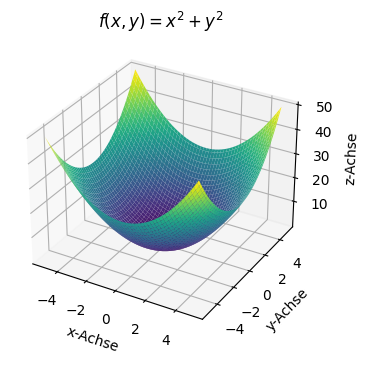

In [5]:
#%matplotlib notebook
plt_function(name="multivariate4", space=(-5.0, 5.0), plot_3D_graph=True)

Ein sehr populäre Metapher, die für die Erklärung der Intuition des Gradient Descent Verfahren verwendet wird, ist die **Wanderer-Metapher**. Stellen Sie sich vor, Sie wandern in den Bergen und plötzlich zieht ein Nebel auf, sodass sie nur noch etwa einen Meter weit sehen können. Sie würden gerne wieder in das Tal kommen und haben kein Handy, keine Karte und kein anderes Orientierungsmittel dabei. Wie finden Sie am Besten ins Tal? Eine Option wäre es, dass Sie sich den Boden genauer angucken und schauen, an welcher Stelle dieser abschüssig ist. Genauso gut können Sie auch gucken, an welcher Stelle der Boden am steilsten ist und Sie gehen dann in die entgegengesetzte Richtung. Alle paar Schritte bleiben Sie stehen, überprüfen dies erneut und passen gegebenenfalls ihre Laufrichtung an, bis Sie im Tal sind.

So arbeitet konzeptuell auch das Gradient Descent Verfahren: Beginned bei einer Stelle schaut es in alle Richtungen und erkennt mithilfe des Gradienten, in welcher Richtung der steilste Anstieg ist. Es bewegt sich dann ein Stück in die entgegengesetzte Richtung und überprüft dann erneut, in welcher Richtung der steilste Anstieg ist und bewegt sich dann wieder in die entgegengesetzte Richtung. Diesen Vorgang können Sie auch in den folgenden beiden GIFs sehen, wobei die linke Funktion die gleiche Funktion wie oben ist, die rechte Funktion hingegen eine etwas komplexere Funktion. Während es bei der linken Funktion im Grunde egal ist, von wo Sie als Wanderer oder das Gradient Descent Verfahren beginnen/beginnt, scheint es in der rechten Funktion relevant zu sein. Sollten Sie oder das Gradient Descent Verfahren dort z.B. auf dem höchsten Berg stehen, könnte es sein, dass Sie oder das Verfahren in dem rechten Tal landen, obwohl Sie vielleicht viel lieber in dem tieferen Tal weiter links gelandet wären (also im **globalen Minimum** anstatt in einem der **lokalen Minima**).

<div class="imgrow">
    <div class="imgcolumn2">
       <figure>
          <img src="https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif" />
        </figure> 
    </div>
    <div class="imgcolumn2">
       <figure>
           <img src="https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif" />
        </figure> 
    </div>
</div>



### 3.1. Unterschiede zum Newton-Raphson Verfahren  <a class="anchor" id="3-1"/>

Das Gradient Descent Verfahren unterscheidet sich in zwei Hauptpunkten vom **Newton-Raphson** Verfahren:
- **Anzahl der Variablen**. Gradient Descent wird verwendet, wenn unsere Funktion zwei oder mehr Variablen beinhaltet. Wie auch beim Newton-Raphson Verfahren müssen wir für das Gradient Descent Verfahren die Ableitung der Funktion berechnen. Da wir es hier mit mehr als einer Variablen zu tun haben, müssen wir den **Gradienten**, den wir in Kapitel 7 kennengelernt haben, verwenden. Dieser ist bekanntlich ein Vektor, der alle **partiellen Ableitungen erster Ordnung** einer Funktion beinhaltet und in Richtung der **steilsten Steigung** der Funktion zeigt. Tatsächlich verrät der Name "Gradient Descent" bereits, dass wir hier den Gradienten verwenden müssen.
- **Ziel**. Anstatt wie beim Newton-Raphson Verfahren den Schnittpunkt der Funktion mit der x-Achse zu approximieren, wird mithilfe des Gradient Descent Verfahren der Minimalwert der Funktion, also das **globale Minimum**, gesucht. 

Das Gradient Descent Verfahren kann sowohl für **Skalarfunktionen** als auch für **Vektorfunktionen** verwendet werden. Für letztere müsste die **Jacobi-Matrix** anstatt des Gradienten verwendet werden. Wir gucken uns der Einfachheit halber nur das Gradient Descent Verfahren für Skalarfunktionen an. Gucken wir uns nun eine (vereinfachte) Formel für das Gradient Descent Verfahren an und gehen ihre Bestandteile durch:<br>

$\mathbf{p}_{i+1} = \mathbf{p}_i - \alpha \cdot \nabla{f(a)}$<br>

Im Grunde ähnelt die Formel vom Aufbau her der Formel für das Newton-Raphson Verfahren. Neu ist der $\alpha$-Parameter. Was dieser bedeutet, schauen wir uns gleich an. Aktuell konzentrieren wir uns erst einmal auf den Kern der Formel und setzen $\alpha = 1$, damit er aus unserer Formel verschwindet. Zudem setzen wir für $a$ in $\nabla{f(a)}$, welches für alle möglichen Variablen steht (siehe Kapitel 7), die Variablen $x$ und $y$ ein, da wir uns eine Funktion mit zwei Variablen angucken werden. Wir erhalten nun:<br>


$\mathbf{p}_{i+1} = \mathbf{p}_i - \nabla{f(x,y)}$<br>


$p$ enthält unsere Werte, den wir nach und nach anpassen, in der Hoffnung, dass wir so irgendwann zu einem Punkt gelangen, der nahe oder beinahe gleich zum globalen Minimum ist. Die Werte sind in unserem Fall die Werte x und y. Diese speichern wir in einem Vektor, z.B. $\mathbf{p_i} = \begin{bmatrix} 2 & 3\end{bmatrix}$. Diesen Vektor stellen wir als **Zeilenvektor** dar, um ihn besser multiplizieren zu können. Jede **Iteration** ziehen wir diesen Werten ihre partielle Ableitung ab. Rechnerisch könnte das also auch so aussehen:<br>


$x_{i+1} = x_i - \frac{\partial f}{\partial x}$<br>
$y_{i+1} = y_i - \frac{\partial f}{\partial y}$<br>

Das in einem Vektor zu berechnen, ist jedoch um einiges bequemer. Dort ziehen wir direkt den Gradienten ab. Konzeptionell bedeutet dies, dass wir uns in Richtung des **negativen Gradienten** bewegen. Das macht Sinn, da wir in Kapitel 7 herausgefunden hatten, dass der Gradient in Richtung der **steilsten Steigung** zeigt. Wir wollen aber genau in die <u>entgegengesetzte</u> Richtung, weshalb wir den negativen Gradienten verwenden.

<div class=digression>
    <b>Exkurs</b>: Alternative Gradient Descent Formel 
    <br>
    <br>
    In der Praxis werden die einzelnen Variablen wie $x$ und $y$ oft seperat voneinander mit dem Gradient Descent Verfahren optimiert. Dort werden die Variablen auch gerne mit dem griechischen Buchstaben Theta ($\Theta$) und einer Nummerierung (z.B. $\Theta_1$) dargestellt. Oft wird auch angegeben, dass der Algorithmus so lange wiederholt wird, bis er konvergiert. Wundern Sie sich also nicht, wenn Sie in der Praxis der folgenden Formel begegnen, gemeint ist ebenfalls das Gradient Descent Verfahren:<br>

$\text{repeat until convergence} \{ \\
    \qquad \Theta_0 = \Theta_0 - \alpha \frac{d}{d \Theta_0}J(\Theta_0, \Theta_1)\\
    \qquad \Theta_1 = \Theta_1 - \alpha \frac{d}{d \Theta_1}J(\Theta_0, \Theta_1)\\
\}$<br>
    
Die Formel wurde in leicht abgewandelter Form dem Kurs "Data Mining" aus dem SS20 der Julius-Maximilians-Universität entnommen. Das $J$ steht hier für eine sogenannte Kostenfunktion, Sie können sich diese der Einfachheit halber einfach als Funktion wie $f(\Theta_0, \Theta_1)$ vorstellen.
</div>

### 3.2. Erste naive Berechnung  <a class="anchor" id="3-2"/>

Rechnen wir nun das Gradient Descent an der folgenden Beispielfunktion durch:<br>

$f(x,y) = x^2 + y^2$<br>


Es wird zuerst ein beliebiger Punkt der Funktion gewählt. Wir wählen hier den Punkt $p1(4.5|4.5|40.5)$. Er wird in der folgenden Code-Zelle in Rot eingezeichnet.[<sup>6</sup>](#fn6) Nun berechnen wir den **Gradienten**:<br>

$\nabla{f(x,y)} = \begin{bmatrix} 2x & 2y \end{bmatrix}$




Nun berechnen wir die **erste Iteration** des Gradient Descent Verfahrens mit unseren Werten:<br>


$\mathbf{p}_{1} = \begin{bmatrix} 4.5 & 4.5 \end{bmatrix} - \begin{bmatrix} 2x & 2y \end{bmatrix} = \begin{bmatrix} 4.5 & 4.5 \end{bmatrix} - \begin{bmatrix} 2 \cdot 4.5 & 2 \cdot 4.5 \end{bmatrix} = \begin{bmatrix} -4.5 & -4.5 \end{bmatrix}$<br>

Der Punkt wird in Lila in der folgenden Code-Zelle geplottet. Berechnen wir nun so auch die **zweite und dritte Iteration**:<br>

$\mathbf{p}_{2} = \begin{bmatrix} -4.5 & -4.5 \end{bmatrix} - \begin{bmatrix} 2 \cdot -4.5 & 2 \cdot -4.5 \end{bmatrix} = \begin{bmatrix} 4.5 & 4.5 \end{bmatrix}$<br>
$\mathbf{p}_{3} =  \begin{bmatrix} -4.5 & -4.5 \end{bmatrix}$<br>

Die Punkte werden in Orange und Grün geplottet. Wir sehen hier nur ein Problem: Unser Verfahren scheint zu **oszillieren**, es "springt" einfach über das globale Minimum. Wir verbessern uns gar nicht. Das hatten wir bereits im Abschnitt zum Newton-Raphson Verfahren gesehen. Wie wir das umgehen können, sehen wir im folgenden Abschnitt.

<hr style="border: 0.1px solid black;"/>
<span id="fn6" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">6</sup>&nbsp; Den $z$-Wert von $40.5$ erhalten wir ja durch das Einsetzen von $x$ (= $4.5$) und $y$ (= $4.5$) in die Funktionsgleichung $f(x,y)$. Um diesen im Graphen besser erkennbar zu machen, wurde der $z$-Wert im Graphen aber um $5$ erhöht.</span><br>

<IPython.core.display.Javascript object>


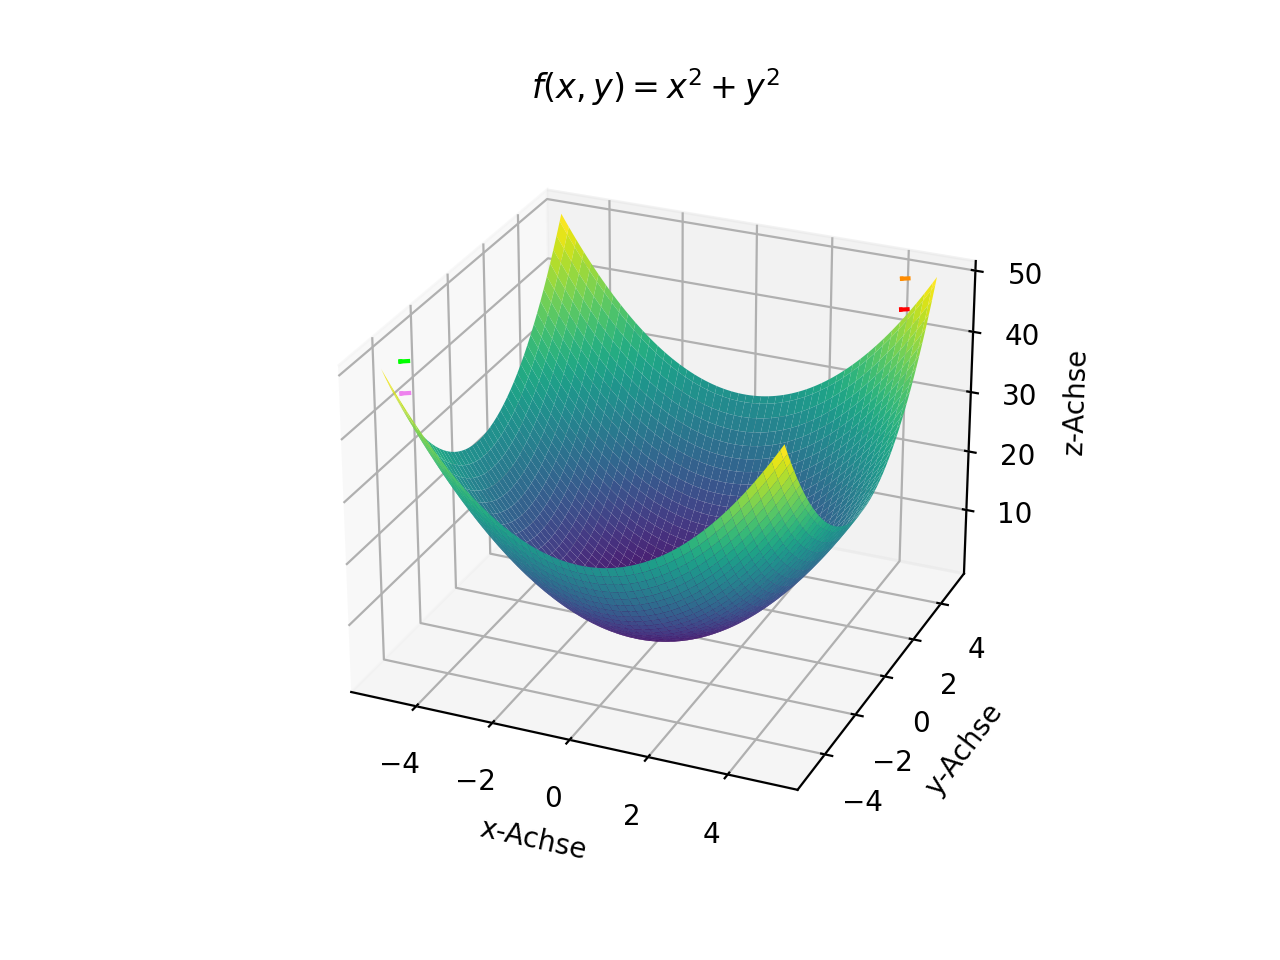

In [11]:
%matplotlib notebook

def f(x,y):
    return x**2 + y**2

x_values = [4.5, -4.5, 4.5, -4.5]
y_values = [4.5, -4.5, 4.5, -4.5]

size = 0.2

p1 = [x_values[0], y_values[0], f(x_values[0], y_values[0])+5, -size, -size, size]
p2 = [x_values[1], y_values[1], f(x_values[1], y_values[1])+5, -size, -size, size]
p3 = [x_values[2], y_values[2], f(x_values[2], y_values[2])+10, -size, -size, size]
p4 = [x_values[3], y_values[3], f(x_values[3], y_values[3])+10, -size, -size, size]

vectors = [p1, p2, p3, p4]
plt_function(name="multivariate4", space=(-5.0, 5.0), plot_3D_graph=True, vector_points=vectors, 
             deactivate_legend=False)

### 3.3. Die Lernrate  <a class="anchor" id="3-3"/>

Im letzten Abschnitt hatten wir gesehen, dass unser Gradient Descent Verfahren **oszillierte**, d.h. zwischen zwei Stellen hin und her "gesprungen" ist. Dies liegt daran, dass wir einen wichtigen Parameter aus unserer Formel ignoriert haben: die **Lernrate** $\alpha$. Diese gibt unsere Größe der Schritte an. Ist sie zu hoch gesetzt, "steigen" wir über das Minimum hinweg. Genau das ist im letzten Abschnitt passiert. Wir müssen nun diese Lernrate mit in unsere Formel einbeziehen:<br>

$\mathbf{p}_{i+1} = \mathbf{p}_i - \alpha \cdot \nabla{f(a)}$<br>

Diese Lernrate setzen wir vor unserer Berechnung fest, z.B. auf $\alpha = 0.1$. Welcher Wert optimal ist, kann vorher nicht gut vorausgesagt werden. Tatsächlich spielt diese Lernrate bei **Neuronalen Netzen** eine wichtige Rolle als **Hyperparameter**, der optimiert werden kann. Es gibt außerdem Verfahren und Methoden, mit denen eine gute Lernrate ermittelt werden kann, dies wird in dieser Tutorialreihe jedoch nicht behandelt. Wir setzen die Lernrate auf $0.1$ und berechnen unsere Iterationen noch einmal:<br>


$\mathbf{p}_{1} = \begin{bmatrix} 4.5 & 4.5 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} 2x & 2y \end{bmatrix} = \begin{bmatrix} 4.5 & 4.5 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} 2 \cdot 4.5 & 2 \cdot 4.5 \end{bmatrix} = \begin{bmatrix} 4.5 & 4.5 \end{bmatrix} - \begin{bmatrix} 0.9 & 0.9 \end{bmatrix} = \begin{bmatrix} 3.6 & 3.6 \end{bmatrix}$<br>
$\mathbf{p}_{2} = \begin{bmatrix} 3.6 & 3.6 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} 2 \cdot 3.6 & 2 \cdot 3.6 \end{bmatrix} = \begin{bmatrix} 2.88 & 2.88 \end{bmatrix}$<br>
$\mathbf{p}_{3} = \begin{bmatrix} 2.88 & 2.88 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} 2 \cdot 2.88 & 2 \cdot 2.88 \end{bmatrix} = \begin{bmatrix} 2.304 & 2.304 \end{bmatrix}$<br>
$\mathbf{p}_{4} = \begin{bmatrix} 2.304 & 2.304 \end{bmatrix} - 0.1 \cdot \begin{bmatrix} 2 \cdot 2.304 & 2 \cdot 2.304 \end{bmatrix} = \begin{bmatrix} 1.8432 & 1.8432 \end{bmatrix}$<br>

Die Werte werden als Vektoren im Graphen in der folgenden Code-Zeile geplottet.[<sup>7</sup>](#fn7) Und tatsächlich zeigen diese Vektoren auf das Minimum und kommen jede Iteration dem Minimum etwas näher.

<hr style="border: 0.1px solid black;"/>
<span id="fn7" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">7</sup>&nbsp; Auch hier wurden die $z$-Werte der Übersicht halber erhöht.</span><br>

<IPython.core.display.Javascript object>


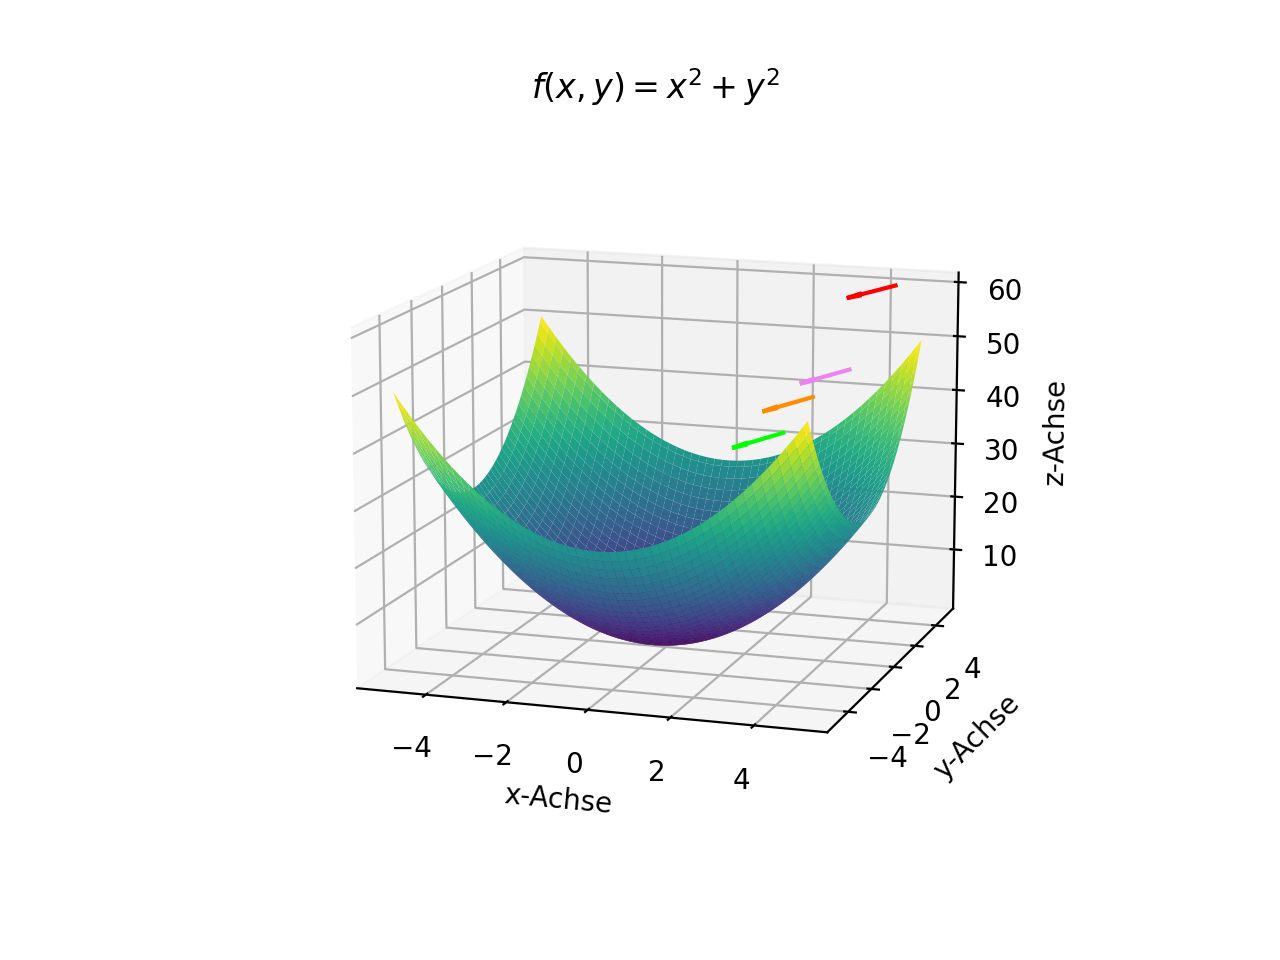

In [12]:
%matplotlib notebook

def f(x,y):
    return x**2 + y**2

x_values = [4.5, 3.6, 2.88, 2.304]
y_values = [4.5, 3.6, 2.88, 2.304]

size = 0.7

p1 = [x_values[0], y_values[0], f(x_values[0], y_values[0])+20, -size, -size*3, 0]
p2 = [x_values[1], y_values[1], f(x_values[1], y_values[1])+20, -size, -size*3, 0]
p3 = [x_values[2], y_values[2], f(x_values[2], y_values[2])+25, -size, -size*3, 0]
p4 = [x_values[3], y_values[3], f(x_values[3], y_values[3])+25, -size, -size*3, 0]

vectors = [p1, p2, p3, p4]
plt_function(name="multivariate4", space=(-5.0, 5.0), plot_3D_graph=True, vector_points=vectors, 
             deactivate_legend=False)

Das können wir nun so oft durchführen, bis das Gradient Descent Verfahren **konvergiert**, d.h. sich die Werte kaum mehr ändern oder ein vorher definiertes **Abbruchkriterium** erfüllt wird. Tatsächlich nähern wir uns hier mit dem Gradient Descent Verfahren gut dem Minimum an, nach 37 Iterationen sind unsere Werte schon sehr klein:<br>

$\mathbf{p}_{37} = \begin{bmatrix} 0.00116827 & 0.00116827 \end{bmatrix}$<br>



<div class="tool">
<span class="invisible_border"><img src="img/icons/tools.svg" class="icon"/><b>Werkzeugkasten: <u>Gradient Descent</u></b></span>
    <br>
    <br><b>Gradient Descent</b> ist Verfahren, mit dem allgemeine Optimierungsprobleme wie das Finden des <b>globalen Minimums</b> lösen kann. Es ist ein <b>iteratives Verfahren</b>, wird also mehr als einmal durchgeführt. Anders als das verwandte Newton-Raphson Verfahren wird das Gradient Descent Verfahren für multivariate Funktionen angewendet. Die Formel dafür lautet:<br>
    
$\mathbf{p}_{i+1} = \mathbf{p}_i - \alpha \cdot \nabla{f(a)}$<br>
    
- $\mathbf{p}$ ist ein Zeilenvektor, bei dem jeder Eintrag für eine der Variablen steht, also z.B. $\begin{bmatrix} x & y\end{bmatrix}$.<br>
- $\alpha$ ist die sogenannte <b>Lernrate</b>, die angibt, wie groß die Veränderung der Werte bei jedem Schritt ist: Je höher, desto größere Schritte.<br>
- $\nabla{f(a)}$ ist der <b>Gradient</b> der Funktion, der alle partiellen Ableitungen erster Ordnung aller Variablen enthält. Bei Vektorfunktionen ist dieser eine <b>Jacobi-Matrix</b>.
    
<u>Alternative Schreibweise</u>:<br>
    
In der Praxis eine häufig verbreitete Formel ist:<br>
    
$\text{repeat until convergence} \{ \\
    \qquad \Theta_0 = \Theta_0 - \alpha \frac{d}{d \Theta_0}J(\Theta_0, \Theta_1)\\
    \qquad \Theta_1 = \Theta_1 - \alpha \frac{d}{d \Theta_1}J(\Theta_0, \Theta_1)\\
\}$<br>
    
- $\Theta_0, \Theta_1$ stehen für die Variablen, die hier durchnummeriert werden.
- $J(\Theta_0, \Theta_1)$ steht hier für die verwendete Funktion, d.h. man könnte auch $f(\Theta_0, \Theta_1)$ schreiben (das $J$ steht in diesem Fall für eine spezifische Funktion, die sogenannte Kostenfunktion)
- $\text{repeat until convergence}$ zeigt an, dass die Berechnungen solange durchgeführt werden, bis die Werte <b>konvergieren</b>, d.h. sich kaum mehr ändern. Damit wird gezeigt, dass das Verfahren ein <b>iteratives Verfahren</b> ist.
    
    
</div>

### 3.4. Funktionen mit mehreren Minima  <a class="anchor" id="3-4"/>

Nun haben wir hier natürlich wieder das altbewährte Problem, dass die Funktionen in der Praxis nicht so simpel sind wie die Funktionen in der vorherigen Code-Zeile, sondern weitaus komplexer. Ein großes Problem sind Funktionen, die mehrere Minima haben (siehe Abbildung 1). Es kann mit dem Gradient Descent Verfahren passieren, dass wir in einem **lokalen Minimum** stecken bleiben. Unser Verfahren bricht dann ab, obwohl wir das **globale Minimum** nicht gefunden haben. In Abbildung 2 wird ein Konturdiagramm der Funktion aus Abbildung 1 mit Gradienten zu einer Reihe von Punkten dargestellt. Unten befindet sich das globale Minimum, welches wir gerne mit dem Gradient Descent Verfahren finden wollen. Starten wir jedoch links oben, kann es sein, dass wir im lokalen Minimum (links) landen. Das Gradient Descent Verfahren terminiert dann in diesem lokalen Minimum, da die Steigung immer kleiner wird, je näher wir dem lokalen Minimum kommen. 

Warum das bei Neuronalen Netzen weniger ein Problem ist und welche Stellen von Funktionen bei Neuronalen Netzen problematischer sind, wird in diesem <a href="https://www.youtube.com/watch?v=fODpu1-lNTw">Video</a> sehr gut erklärt.

<div class="imgrow">
    <div class="imgcolumn2">
       <figure>
          <img src="img/contour_to_3d.gif" align="left" style="width: 462px;">
           <figcaption style="font-size: 10px;"><b>Abbildung 1</b>: $f(x,y) = 3(1-x)^{2} \cdot e^{(-x^{2} - (y+1)^{2})} -10(\frac{x}{5}-x^{3}-y^{5})\cdot e^{(-x^{2}-y^{2})}-\frac{1}{3}\cdot e^{-(x+1)^{2}-y^{2}}$</figcaption>
        </figure> 
    </div>
    <div class="imgcolumn2">
       <figure>
           <img src="img/contour_vectors.png" align="left" style="width: 430px;" alt="Die Visualisierung wurde Woche 2 dieses Coursera-Kurses entnommen: https://www.coursera.org/learn/multivariate-calculus-machine-learning ."/>
           <figcaption><b>Abbildung 2</b>: Das Konturdiagramm der Funktion aus Abbildung 1 mit eingezeichneten Gradienten.</figcaption>
        </figure> 
    </div>
</div>

## Gradient Descent Quiz <a class="anchor" id="q1"/><br>

<div class="task">
    <b>Aufgabe</b>: Gradient Descent Quiz 
    <br>
    <br> Lösen Sie das folgende Quiz "<b>Gradient Descent Quiz</b>". Sie benötigen hier auf jeden Fall einen Taschenrechner.
</div>

In [27]:
start_quiz(101, "calculus")

---
---


## 4. Weitere Themen und Anwendungsfälle  <a class="anchor" id="4"/>

Glückwunsch, Sie haben die Calculus-Tutorialreihe erfolgreich beendet. Sie sollten nun einen guten Eindruck zu den Calculus-Themen haben, die für Ihr Digital Humanities Studium relevant sind. Wenn Sie Interesse haben, Ihr Calculus-Wissen noch ein wenig mehr zu vertiefen, besuchen Sie doch den <a href="https://www.coursera.org/specializations/mathematics-machine-learning">"Math for Machine Learning"</a> Kurs von Coursera. Sie werden viele Dinge, die wir hier besprochen haben, wiederfinden und noch einige mehr, wie die *Lineare Regression*, die Implementierung von simplen *Neuronalen Netzen* und *Langrange-Multiplikatoren*. Eine weitere Empfehlung wäre die Video-Serie <a href="https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr">"Essence of Calculus</a> vom populären Mathe-YouTuber *3Blue1Brown*; dort werden Ihnen aber auch Themen begegnen, die für Ihr Studium wahrscheinlich weniger relevant sind (z.B. Integralberechnung).


Die Themen, die wir in dieser Calculus-Tutorialreihe besprochen haben, finden in vielen Bereichen der Digital Humanities mal mehr und mal weniger Anwendung. Der wohl wichtigste Anwendungsfall ist aber beim Training von **Neuronalen Netzen** aus dem Bereich des **Deep Learning**. Seit einigen Jahren haben diese Neuronalen Netze durchbrechende Erfolge geleistet und haben die **KI-Forschung** unglaublich stark geprägt. Aus diesem Grund werden Sie in Ihrem Studium mit einer sehr hohen Wahrscheinlichkeit diesen Netzen begegnen. Dort werden Sie Bibliotheken kennenlernen, mit denen Sie diese Netze effektiv umsetzen und für die Lösung verschiedenster Probleme nutzen können. Die Mathematik, die Sie hier gelernt haben, hilft Ihnen dabei zu verstehen, wie Neuronale Netze im Kern funktionieren und was mathematisch beim Training dieser Netze passiert. Sollten Sie Interesse haben, sich dem Thema "Deep Learning" in Eigenarbeit anzunähern, habe ich zwei Empfehlungen für Sie:
- **Deep Learning Specialization (Coursera)** [<a href="https://www.coursera.org/specializations/deep-learning">Link</a>]. Dieser Online-Kurs von Deep Learning Legende *Andrew Ng* ist einer der bekanntesten und besten Einsteigerkurse zum Thema "Deep Learning". Zu finden ist dieser auf der Lernplattform *Coursera*, bei der Inhalte zu verschiedensten Themen mithilfe von Videos, Übungsquizzen und -aufgaben vermittelt werden. Sie werden dort die wichtigsten Inhalte zum Deep Learning beigebracht bekommen. Sie können diesen Kurs kostenlos besuchen, wenn Sie diesen als Gasthörer bearbeiten. Wenn Sie für diesen Kurs bezahlen (<u>Hinweis</u>: nach Studentenrabatte oder -aktionen Ausschau halten), können Sie ein Zertifikat erhalten, viele wichtige Quizze und Aufgaben lösen und Feedback für die Lösungen erhalten. Wie und wann Sie diesen Kurs bearbeiten, bleibt Ihnen überlassen, Sie lernen Inhalte nur über das Selbststudium. Der Kurs setzt etwas Mathematik im Bereich von Calculus und Linearer Algebra voraus, welche Sie aber mit dieser Tutorialreihe vermittelt bekommen haben sollten. 
- **KINSLEY, Neural Networks from Scratch in Python** [<a href="https://nnfs.io/">Link</a>]. Im oben genannten Deep Learning Kurs wird man zu einem Zeitpunkt simple Neuronale Netze per Hand in Python implementieren. Diese Herangehensweise an Neuronale Netze fand ich persönlich sehr ansprechend und mein Verständnis von Neuronalen Netzen aber auch der Bibliothek `NumPy` konnte dadurch erweitert werden. Das Problem, dass sich m.E. beim Lernen und der Anwendung von Deep Learning ergibt, ist, dass man durch die sehr guten Python-Bibliotheken zwar Neuronale Netze einfach und schnell implementieren kann, jedoch den Bezug zu dem, was ein Neuronales Netz eigentlich macht, verliert. Doch genau dieses Verständnis kann unglaublich hilfreich sein. Ich empfehle deshalb das Buch des Python-YouTubers *sentdex*, der m.E. das beste Buch zu diesem Thema veröffentlicht hat, da es sehr einsteigerfreundlich, aber zeitgleich auch sehr informativ und gut aufbereitet ist. Dieses Buch ist nicht kostenlos, die Tutorialreihe in Form von Videos jedoch schon: <a href="https://www.youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3">Link zur Playlist</a>. Die Playlist ist aktuell noch nicht abgeschlossen (Stand März 2021), wird aber in unregelmäßigen Abständen aktualisiert. Das Buch/die Playlist kann am besten entweder nach oder während dem Besuchen eines Deep Learning Kurses (Coursera-, Uni- oder ein anderer Kurs) durchgearbeitet werden oder aber in Zusammenhang mit anderen Lernmaterialien.  